In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import svm

In [2]:
# Read dataset
df = pd.read_csv('precios.csv')
# Change the date from string to datetime format
df['fecha'] = pd.to_datetime(df['fecha'])
# Change the date to ordinal value in order to use it for SVR
df['fecha'] = df['fecha'].map(dt.datetime.toordinal)

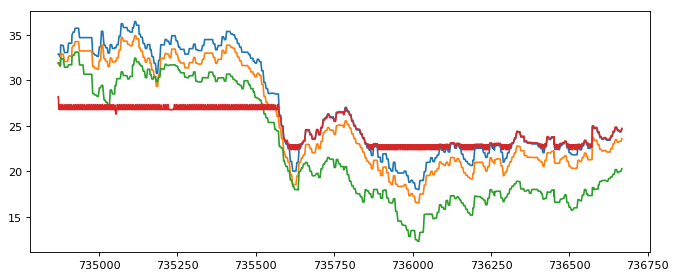

Precio para 2018-01-11: [ 24.85239358]


In [3]:
# Create SVR model with 'rbf' kernel in order to have better predictions
clf = svm.SVR(kernel='rbf', C=1.4)

# This particular training was made on the "super" gas type
clf.fit(df[['fecha']], df['super'].values.ravel())

# Prediction for all the dates in order to plot it
df['pred_super'] = clf.predict(df[['fecha']])

fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df[['fecha']], df[['super']])
plt.plot(df[['fecha']], df[['regular']])
plt.plot(df[['fecha']], df[['diesel']])
plt.plot(df[['fecha']], df[['pred_super']])
plt.show()

# The prediction can be compared on the official price at
# http://www.mem.gob.gt/hidrocarburos/precios-combustible-nacionales/
hoy = dt.date.today()
print('Precio para {}: {}'.format(hoy, clf.predict(dt.datetime.toordinal(hoy))))